## Import Data

In [2]:
# Here are all imports that you will need

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
#from IPython.display import display

In [3]:
# Data download from sklearn
from sklearn.datasets import load_iris
data=load_iris().data
target=load_iris().target
df_data=pd.DataFrame(data,columns=['sepal_length','sepal_width','petal_length','petal_width'])
df_target=pd.DataFrame(target,columns=['target'])

In [4]:
# Merge the DataFrames into one
df_merge=df_target.merge(df_data
                         , left_index=True
                         , right_index=True
                         , how="inner")
df_merge.columns

Index(['target', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

## Data inspection

Generally, the dataset has a pretty good quality regarding no null value across all columns. 
When we look close to dependent variable- class,contains 3 classes of 50 instances each, which indicates the dataset is balanced. Meanwhile, feature scaling is not needed because dependent variables eatures are all on a similar scale. 

In [5]:
# Rename columns
df_merge.columns=['class','sepal length in cm','sepal width in cm'
                  ,'petal length in cm','petal width in cm']

In [6]:
# Display the first 5 rows of the dataset
df_merge.head()

,class,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
0,0,5.1,3.5,1.4,0.2
1,0,4.9,3.0,1.4,0.2
2,0,4.7,3.2,1.3,0.2
3,0,4.6,3.1,1.5,0.2
4,0,5.0,3.6,1.4,0.2


In [7]:
# Understand the dataset
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   class               150 non-null    int32  
 1   sepal length in cm  150 non-null    float64
 2   sepal width in cm   150 non-null    float64
 3   petal length in cm  150 non-null    float64
 4   petal width in cm   150 non-null    float64
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [8]:
df_merge["class"].value_counts()

2    50
1    50
0    50
Name: class, dtype: int64

In [9]:
df_merge.describe()

,class,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,1.000000,5.843333,3.057333,3.758000,1.199333
std,0.819232,0.828066,0.435866,1.765298,0.762238
min,0.000000,4.300000,2.000000,1.000000,0.100000
25%,0.000000,5.100000,2.800000,1.600000,0.300000
50%,1.000000,5.800000,3.000000,4.350000,1.300000
75%,2.000000,6.400000,3.300000,5.100000,1.800000
max,2.000000,7.900000,4.400000,6.900000,2.500000


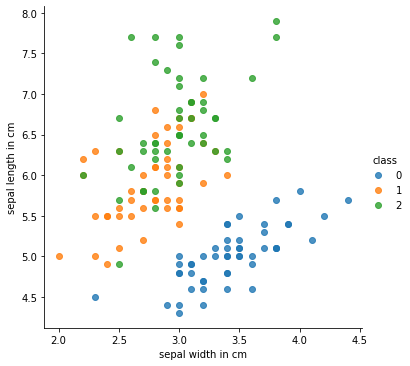

In [10]:
# scatter plot 1 - sepal_width vs sepal_length
scatter_sepal=sns.lmplot(  x="sepal width in cm"
                         , y="sepal length in cm"
                         , hue='class'
                         , data=df_merge
                         , fit_reg= False ### don't show the line
                         )

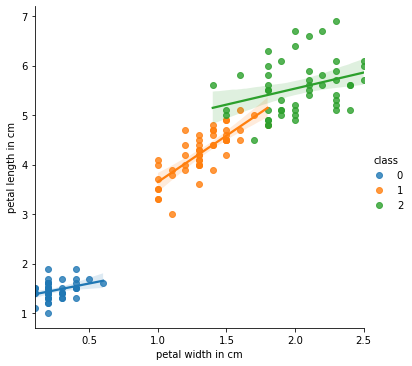

In [11]:
# scatter plot 2 - petal_width vs petal_length
scatter_petal=sns.lmplot(  x="petal width in cm"
                         , y="petal length in cm"
                         , hue='class'
                         , data=df_merge)

## Prepare the data for classification

In [16]:
# create array for the clean dataset quicker process in running model
x= np.array(df_merge.iloc[:,0:4])
y= np.array(df_merge['class'])

In [17]:
x=df_merge[['sepal length in cm','sepal width in cm'
                  ,'petal length in cm','petal width in cm']]
y=df_merge['class']

print(x.shape)
print(y.shape)

(150, 4)
(150,)


## Split the data into train and test

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


## Run the fit

In [19]:
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(x_train, y_train) 

KNeighborsClassifier(n_neighbors=3)

## Predict the class from features

In [20]:
# Testing
y_pred = knn_clf.predict(x_test) 
print(y_pred.shape)
y_pred

(30,)


array([2, 2, 1, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 0, 1, 2, 1,
       0, 2, 1, 0, 2, 1, 2, 0])

In [21]:
# Accuracy Score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9333333333333333


In [22]:
# count numbers of correct prediction
print((y_pred == y_test).sum())

28


In [23]:
# count numbers of wrong prediction
print((y_pred != y_test).sum())

2


## How accuracy score and the number of correct predictions change with the number of neighbors

In [52]:
# Define our own KNN Performance function to 
## show accuracy score
## calaculate the average # correct predictions
def KNNperf(K, n):
#   global results
    results=pd.DataFrame(columns=["K","AvgCorrectCount","AvgAccuracyScore"])
    CorrectCountList = []
    AccuracyScoreList = []
    for i in range(n):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=3)
        knn_clf = KNeighborsClassifier(n_neighbors=K)
        knn_clf.fit(x_train, y_train) 
        y_pred = knn_clf.predict(x_test) 
        CorrectCount=(y_pred == y_test).sum()
        AccuracyScore=accuracy_score(y_test, y_pred)
        CorrectCountList.append(CorrectCount)
        AccuracyScoreList.append(AccuracyScore)
#         print (CorrectCountList)
#         print (AccuracyScoreList)
    AvgCorrectCount=np.mean(CorrectCountList)
    AvgAccuracyScore=(sum(AccuracyScoreList)/len(AccuracyScoreList)).round(2)
    results=results.append({'K':K,'AvgCorrectCount':AvgCorrectCount,'AvgAccuracyScore':AvgAccuracyScore},ignore_index=True)
    #print("The avg accuracy score of correct predictions for", K, "neighbors is",AvgAccScore, "and the avg count of correct predictions is",AvgCorrectCount"(with", n, "observations)")
    return results

In [53]:
# Test KNN function
KNNperf(3, 10)

,K,AvgCorrectCount,AvgAccuracyScore
0,3.0,43.0,0.96


In [54]:
# Run KNNperf function on different K and plot accuracy score 
# K: 1, 3, 5, 7, 10, 20, 30, 40, and 50
df=pd.DataFrame(columns=["K","AvgCorrectCount","AvgAccuracyScore"])
for K in (1,3,5,7,10,20,30,40,50):
    results = KNNperf(K, n=10)
    df=df.append(results)
df

,K,AvgCorrectCount,AvgAccuracyScore
0,1.0,43.0,0.96
0,3.0,43.0,0.96
0,5.0,43.0,0.96
0,7.0,43.0,0.96
0,10.0,43.0,0.96
0,20.0,42.0,0.93
0,30.0,43.0,0.96
0,40.0,41.0,0.91
0,50.0,41.0,0.91


Text(0.5, 1.0, 'KNN Classification Accuracy Score')

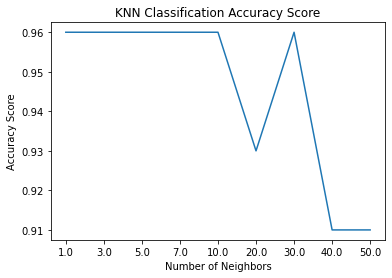

In [55]:
# Plot the accuracy score
X=df['K'].apply(str)
Y=df['AvgAccuracyScore']
plt.plot(X,Y)
plt.ylabel("Accuracy Score")   # title of the Y axis
plt.xlabel("Number of Neighbors")   # title of the X axis
plt.title("KNN Classification Accuracy Score")   # plot title, will be displayed above the plot

Conclusion: KNN Classification model will make the most accurate prediction when K=3, aka the model uses the closest 3 points class as reference. 